<a href="https://colab.research.google.com/github/lucacbbi/Projetos_data_science/blob/main/COVID_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Pacotes
!pip install plotly==4.14.3
!pip install -q mplcyberpunk
!pip install requests_html
!pip install wget

In [3]:
# BIBLIOTECAS
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import mplcyberpunk


%matplotlib inline
plt.style.use("ggplot")
sns.set_style()

# pd.options.plotting.backend = "plotly"
pd.set_option('mode.chained_assignment', None)

#Extração da base de dados


**<h1>Dicionário de dados</h1>**


---
*SRAG 2020 - Banco de Dados de Síndrome Respiratória Aguda Grave - incluindo dados da COVID-19*
[https://opendatasus.saude.gov.br/ro/dataset/bd-srag-2020](https://opendatasus.saude.gov.br/ro/dataset/bd-srag-2020)
<p>
DT_NOTIFIC: Data do preenchimento da ficha de
notificação.
</p>
<p>
DT_INTERNA: Data da internação por SRAG.
</p>
<p>
NU_IDADE_N: Idade.
</p>
<p>
CS_SEXO: Sexo. 

1.   Masculino
2.   Feminino
3.   Indefinido

</p>
<p>
SG_UF: UF
</p>
<p>
DT_SIN_PRI: Data de 1ºs sintomas.
</p>
<p>
CS_GESTANT: Gestante.

0.   Ignorado ou 9
1.   1º Trimestre
2.   2º Trimestre
3.   3º Trimestre
4.   Idade Gestacional indígena
5.   Não
6.   Não se aplica

</p>
<p>
CS_RACA: Raça/Cor

0.   Ignorado ou 9
1.   Branca
2.   Preta
3.   Amarela
4.   Parda
5.   Indígena

</p>
<p>
CS_ESCOL_N: Escolaridade.

0.   Sem escolaridade/Analfabeto
1.   Fundamental 1º ciclo (1ª a 5ª série)
2.   Fundamental 2º ciclo (6ª a 9ª série)
3.   Médio (1º ao 3º ano)
4.   Superior
5.   Ignorado

</p>
<p>
HISTO_VGM: Paciente tem histórico de viagem internacional até 14 dias antes do início dos sintomas?

1.   Sim
2.   Não
9.   Ignorado - 9

</p>
<p>
NOSOCOMIAL: Trata-se de caso nosocomial (infecção adquirida no hospital)?

1.   Sim
2.   Não
9.   Ignorado - 9

</p>
<p>
FEBRE: Sinais e Sintomas/Febre.

1.   Sim
2.   Não
9.   Ignorado - 9

</p>
<p>
TOSSE: Sinais e Sintomas/Tosse.

1.   Sim
2.   Não
9.   Ignorado - 9

</p>
<p>
GARGANTA: Sinais e Sintomas/Dor de Garganta.

1.   Sim
2.   Não
9.   Ignorado - 9

</p>
<p>
DISPNEIA: Sinais e Sintomas/Dispneia.

1.   Sim
2.   Não
9.   Ignorado - 9

</p>
<p>
DESC_RESP: Sinais e Sintomas/Desconforto Respiratório

1.   Sim
2.   Não
9.   Ignorado - 9

</p>
<p>
SATURACAO: Sinais e Sintomas/Saturação O2 < 95%.

1.   Sim
2.   Não
9.   Ignorado - 9

</p>
<p>
DIARREIA: 5-Sinais e Sintomas/Diarreia.

1.   Sim
2.   Não
9.   Ignorado - 9

</p>
<p>
VOMITO: Sinais e Sintomas/Vômito.

</p>
<p>
DOR_ABD: Sinais e Sintomas/Dor abdominal.

1.   Sim
2.   Não
9.   Ignorado - 9

</p>
<p>
FADIGA: Sinais e Sintomas/Fadiga.

1.   Sim
2.   Não
9.   Ignorado - 9

</p>
<p>
PERD_OLFT: Sinais e Sintomas/Perda do Olfato.
</p>
<p>
PERD_PALA: Sinais e Sintomas/Perda do Paladar.

1.   Sim
2.   Não
9.   Ignorado - 9

</p>
<p>
OUTRO_SIN: Sinais e Sintomas/Outros.

1.   Sim
2.   Não
9.   Ignorado - 9

</p>
<p>
FATOR_RISC: Fatores de risco.

1.   Sim
2.   Não
9.   Ignorado - 9

</p>
<p>
PUERPERA: Fatores de risco/ Puérpera.

1.   Sim
2.   Não
9.   Ignorado - 9

</p>
<p>
CARDIOPATI: Fatores de risco/ Doença Cardiovascular Crônica.

1.   Sim
2.   Não
9.   Ignorado - 9

</p>
<p>
HEMATOLOGI: Fatores de risco/ Doença Hematológica Crônica.

1.   Sim
2.   Não
9.   Ignorado - 9

</p>
<p>
SIND_DOWN: Fatores de risco/ Síndrome de Down

1.   Sim
2.   Não
9.   Ignorado - 9

</p>
<p>
HEPATICA: Fatores de risco/ Doença Hepática Crônica.


1.   Sim
2.   Não
9.   Ignorado - 9

</p>
<p>
ASMA: Fatores de risco/ Asma.

1.   Sim
2.   Não
9.   Ignorado - 9

</p>
<p>
DIABETES: Fatores de risco/ Diabetes mellitu.

1.   Sim
2.   Não
9.   Ignorado - 9

</p>
<p>
NEUROLOGIC: Fatores de risco/ Doença Neurológica Crônica.


1.   Sim
2.   Não
9.   Ignorado - 9

</p>
<p>
PNEUMOPATI: Fatores de risco/ Outra Pneumatopatia Crônica.


1.   Sim
2.   Não
9.   Ignorado - 9

</p>
<p>
IMUNODEPRE: Fatores de risco/ Imunodeficiência ou Imunodepressão.

1.   Sim
2.   Não
9.   Ignorado - 9

</p>
<p>
RENAL: Fatores de risco/ Doença Renal Crônica.

1.   Sim
2.   Não
9.   Ignorado - 9

</p>
<p>
OBESIDADE: Fatores de risco/ Obesidade.

1.   Sim
2.   Não
9.   Ignorado - 9

</p>
<p>
OBES_IMC: Fatores de risco/ Obesidade (Descrição IMC).

</p>
<p>
OUT_MORBI: Fatores de risco/ Outros.

1.   Sim
2.   Não
9.   Ignorado - 9

</p>
<p>
VACINA: Recebeu vacina contra Gripe na última campanha?

1.   Sim
2.   Não
9.   Ignorado - 9

</p>
<p>
MAE_VAC: Se < 6 meses: a mãe recebeu a vacina?

1.   Sim
2.   Não
9.   Ignorado - 9

</p>
<p>
ANTIVIRAL: Usou antiviral para gripe?

1.   Sim
2.   Não
9.   Ignorado - 9

</p>
<p>
UTI: Internado em UTI?

1.   Sim
2.   Não
9.   Ignorado - 9

</p>
<p>
DT_ENTUTI: Data da entrada na UTI.

</p>
<p>
DT_SAIDUTI: Data da saída da UTI.

</p>
<p>
SUPORT_VEN: Uso de suporte ventilatório? 

1.   Sim, invasivo
2.   Sim, não invasivo
3.   Não
4.   Ignorado - 9

</p>
<p>
CLASSI_FIN: Classificação final do caso.

1.   SRAG por influenza
2.   SRAG por outro vírus respiratório
3.   SRAG por outro agente etiológico, qual:
4.   SRAG não especificado
5.   SRAG por COVID-19

</p>
<p>
EVOLUCAO: Evolução do caso.

1.   Cura
2.   Óbito
3.   Óbito por outras causas
4.   Ignorado - 9

</p>
<p>
DT_EVOLUCA: Data da alta ou óbito.

</p>


In [ ]:
# BASE DE DADOS

from requests_html import HTMLSession
from requests_html import AsyncHTMLSession

session = HTMLSession() # Inicializa sessão GET
url = 'https://opendatasus.saude.gov.br/ro/dataset/bd-srag-2020'
r = session.get(url) 

descriptions_wheather_of_forecast =  r.html.find('.resource-url-analytics') # Realiza a rapagem de de dados do elemento html 

link = descriptions_wheather_of_forecast[2].attrs['href'] # Atributo contendo o link contendo a base de dados que desejamos

# Colunas de relevancia para a analise
usecols=['DT_NOTIFIC','DT_INTERNA','UTI','DT_ENTUTI','DT_SAIDUTI','NU_IDADE_N','CS_SEXO','SG_UF_NOT','DT_SIN_PRI','CS_GESTANT',
         'CS_RACA','CS_ESCOL_N','OUT_MORBI','VACINA','MAE_VAC','ANTIVIRAL','SUPORT_VEN','CLASSI_FIN','EVOLUCAO',
         'HISTO_VGM','NOSOCOMIAL','FEBRE','TOSSE','GARGANTA','DISPNEIA','DESC_RESP','SATURACAO','DIARREIA',
         'VOMITO','DOR_ABD','FADIGA','PERD_OLFT','PERD_PALA','OUTRO_SIN','FATOR_RISC','PUERPERA','CARDIOPATI','HEMATOLOGI',
         'SIND_DOWN','HEPATICA','ASMA','DIABETES','NEUROLOGIC','PNEUMOPATI','IMUNODEPRE','RENAL','OBESIDADE',]

# Leitura dos dados
data_set_sars = pd.read_csv(link,sep=';',error_bad_lines=False,parse_dates=['DT_ENTUTI','DT_SAIDUTI','DT_NOTIFIC','DT_INTERNA'],usecols=usecols)


#Função 

In [6]:
# Cria novas colunas no nosso Data Frame
def create_features(df,label=None):

        df['date'] = df.index
        df['hour'] = df['date'].dt.hour
        df['dayofweek'] = df['date'].dt.dayofweek
        df['quarter'] = df['date'].dt.quarter
        df['month'] = df['date'].dt.month
        df['dayofyear'] = df['date'].dt.dayofyear
        df['dayofmonth'] = df['date'].dt.day
        df['weekofyear'] = df['date'].dt.weekofyear

        X = df[['hour','dayofweek','quarter','month','dayofyear','dayofmonth','weekofyear']]
        if label:
            y = df[label]
            return X, y
        return X

In [7]:

def pie(pct,data):
    return "{:.2f}% ".format(pct)

def func_log(pct,data):
    val = (pct/100)*np.sum(np.log(data)) # Transforma a porcentagem de volta no valor

    val = round(np.exp(val)) # Tira o log

    val = (val/sum(data))*100 # Transforma em porcentagem real

    absolute = int(val/100*np.sum(data)) # Total

    return "{:.2f}% ".format(val)

def func_sqrt(pct,data):
    val = (pct/100)*np.sum(np.sqrt(data)) # Transforma a porcentagem de volta no valor

    val = round(val**2) # Tira a raiz

    val = (val/sum(data))*100

    absolute = int(val/100*np.sum(data)) # Transforma em porcentagem real

    return "{:.2f}% ".format(val)

def func_cbrt(pct,data):
    val = (pct/100)*np.sum(np.cbrt(data)) # Transforma a porcentagem de volta no valor

    val = round(val**3) # Tira a raiz

    val = (val/sum(data))*100

    absolute = int(val/100*np.sum(data)) # Transforma em porcentagem real
    a ="{:.2f}% ".format(val)

    return a

#Tratamento





In [8]:
data_set_sars.head()

,DT_NOTIFIC,DT_SIN_PRI,SG_UF_NOT,CS_SEXO,NU_IDADE_N,CS_GESTANT,CS_RACA,CS_ESCOL_N,NOSOCOMIAL,FEBRE,TOSSE,GARGANTA,DISPNEIA,DESC_RESP,SATURACAO,DIARREIA,VOMITO,OUTRO_SIN,PUERPERA,FATOR_RISC,CARDIOPATI,HEMATOLOGI,SIND_DOWN,HEPATICA,ASMA,DIABETES,NEUROLOGIC,PNEUMOPATI,IMUNODEPRE,RENAL,OBESIDADE,OUT_MORBI,VACINA,MAE_VAC,ANTIVIRAL,DT_INTERNA,UTI,DT_ENTUTI,DT_SAIDUTI,SUPORT_VEN,CLASSI_FIN,EVOLUCAO,HISTO_VGM,DOR_ABD,FADIGA,PERD_OLFT,PERD_PALA
0,2020-07-01,03/01/2020,DF,M,1,6,4.0,5.0,2.0,1.0,1.0,2.0,9.0,1.0,1.0,2.0,2.0,1.0,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,2.0,06/01/2020,2.0,NaN,NaT,2.0,4.0,1.0,0,NaN,NaN,NaN,NaN
1,2020-01-27,26/01/2020,CE,M,9,6,4.0,5.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,26/01/2020,2.0,NaN,NaT,1.0,2.0,1.0,0,NaN,NaN,NaN,NaN
2,2020-02-13,08/02/2020,SP,F,57,5,1.0,9.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,2.0,NaN,2.0,S,1.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,NaN,9.0,NaN,1.0,12/02/2020,1.0,12/02/2020,NaT,1.0,4.0,2.0,0,NaN,NaN,NaN,NaN
3,2020-01-16,10/01/2020,SP,M,1,6,1.0,5.0,2.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,1.0,2.0,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,1.0,16/01/2020,2.0,NaN,NaT,3.0,NaN,NaN,0,NaN,NaN,NaN,NaN
4,2020-02-26,24/02/2020,SP,F,28,5,1.0,4.0,9.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,2.0,NaN,NaN,NaN,NaT,3.0,4.0,1.0,1,NaN,NaN,NaN,NaN


In [9]:
# Dados covid
data_set_cov = data_set_sars[data_set_sars['CLASSI_FIN']==5]
data_set_cov.head()

,DT_NOTIFIC,DT_SIN_PRI,SG_UF_NOT,CS_SEXO,NU_IDADE_N,CS_GESTANT,CS_RACA,CS_ESCOL_N,NOSOCOMIAL,FEBRE,TOSSE,GARGANTA,DISPNEIA,DESC_RESP,SATURACAO,DIARREIA,VOMITO,OUTRO_SIN,PUERPERA,FATOR_RISC,CARDIOPATI,HEMATOLOGI,SIND_DOWN,HEPATICA,ASMA,DIABETES,NEUROLOGIC,PNEUMOPATI,IMUNODEPRE,RENAL,OBESIDADE,OUT_MORBI,VACINA,MAE_VAC,ANTIVIRAL,DT_INTERNA,UTI,DT_ENTUTI,DT_SAIDUTI,SUPORT_VEN,CLASSI_FIN,EVOLUCAO,HISTO_VGM,DOR_ABD,FADIGA,PERD_OLFT,PERD_PALA
7,2020-06-03,02/03/2020,PA,M,53,6,4.0,4.0,2.0,1.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,1.0,2.0,S,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,NaN,1.0,06/03/2020,1.0,06/03/2020,NaT,2.0,5.0,NaN,2,NaN,NaN,NaN,NaN
24,2020-03-25,17/03/2020,SP,M,57,6,NaN,NaN,2.0,1.0,1.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,NaN,2.0,24/03/2020,2.0,NaN,NaT,2.0,5.0,1.0,2,NaN,NaN,NaN,NaN
49,2020-03-23,14/03/2020,SP,F,68,5,1.0,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,S,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,23/03/2020,2.0,NaN,NaT,2.0,5.0,1.0,0,NaN,NaN,NaN,NaN
51,2020-03-20,11/03/2020,SP,F,54,5,1.0,9.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,2.0,NaN,NaN,S,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,9.0,NaN,1.0,13/03/2020,1.0,16/03/2020,NaT,1.0,5.0,2.0,2,NaN,NaN,NaN,NaN
62,2020-03-21,15/03/2020,SP,M,77,6,1.0,2.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0,NaN,S,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,20/03/2020,1.0,21/03/2020,NaT,1.0,5.0,2.0,2,NaN,NaN,NaN,NaN


Faremos a separação de sintomas e comorbidades para nalisarmos os dois de forma isolada mais tarde.

In [10]:
sintomas = ['NOSOCOMIAL','FEBRE','TOSSE','GARGANTA','DISPNEIA','DESC_RESP','SATURACAO','DIARREIA','VOMITO','OUTRO_SIN','PUERPERA',
            'DOR_ABD','FADIGA','PERD_OLFT','PERD_PALA']
            
comorbidades = ['FATOR_RISC','CARDIOPATI','HEMATOLOGI','SIND_DOWN','HEPATICA','ASMA','DIABETES','NEUROLOGIC',
                'PNEUMOPATI','IMUNODEPRE','RENAL','OBESIDADE','OUT_MORBI']

In [11]:
# Tratamento
data_set_cov.loc[:,sintomas] = data_set_cov[sintomas].fillna(0)
data_set_cov.loc[:,sintomas] = data_set_cov[sintomas].replace(9,0)
data_set_cov.loc[:,sintomas] = data_set_cov[sintomas].replace(2,0)
data_set_cov.loc[:,sintomas] = data_set_cov[sintomas].replace(3,0)


data_set_cov.loc[:,comorbidades] = data_set_cov[comorbidades].fillna(0)
data_set_cov.loc[:,comorbidades] = data_set_cov[comorbidades].replace(9,0)
data_set_cov.loc[:,comorbidades] = data_set_cov[comorbidades].replace(2,0)
data_set_cov.loc[:,comorbidades] = data_set_cov[comorbidades].replace(3,0)

data_set_cov.loc[:,'UTI'] = data_set_cov['UTI'].fillna(0)
data_set_cov.loc[:,'UTI'] = data_set_cov['UTI'].replace(2,0)
data_set_cov.loc[:,'UTI'] = data_set_cov['UTI'].replace(3,0)
data_set_cov.loc[:,'UTI'] = data_set_cov['UTI'].replace(9,0)

data_set_cov.loc[:,'EVOLUCAO'] = data_set_cov['EVOLUCAO'].fillna(0)
data_set_cov.loc[:,'EVOLUCAO'] = data_set_cov['EVOLUCAO'].replace(1,0)
data_set_cov.loc[:,'EVOLUCAO'] = data_set_cov['EVOLUCAO'].replace(9,0)
data_set_cov.loc[:,'EVOLUCAO'] = data_set_cov['EVOLUCAO'].replace(2,1)
data_set_cov.loc[:,'EVOLUCAO'] = data_set_cov['EVOLUCAO'].replace(3,1)

data_set_cov.loc[:,'SUPORT_VEN'] = data_set_cov['SUPORT_VEN'].fillna(0)
data_set_cov.loc[:,'SUPORT_VEN'] = data_set_cov['SUPORT_VEN'].replace(9,0)
data_set_cov.loc[:,'SUPORT_VEN'] = data_set_cov['SUPORT_VEN'].replace(2,0)

data_set_cov.loc[:,'FATOR_RISC'] = data_set_cov['FATOR_RISC'].replace('S',1)
data_set_cov.loc[:,'FATOR_RISC'] = data_set_cov['FATOR_RISC'].replace('N',0)

data_set_cov.loc[:,'CS_ESCOL_N'] = data_set_cov['CS_ESCOL_N'].replace(9,5)


In [46]:
print('Quantidade de colunas:',len(data_set_cov.columns))

Quantidade de colunas: 47


In [13]:
data_set_cov.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 701680 entries, 7 to 1197338
Data columns (total 47 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   DT_NOTIFIC  701680 non-null  datetime64[ns]
 1   DT_SIN_PRI  701680 non-null  object        
 2   SG_UF_NOT   701680 non-null  object        
 3   CS_SEXO     701680 non-null  object        
 4   NU_IDADE_N  701680 non-null  int64         
 5   CS_GESTANT  701680 non-null  int64         
 6   CS_RACA     671678 non-null  float64       
 7   CS_ESCOL_N  487443 non-null  float64       
 8   NOSOCOMIAL  701680 non-null  float64       
 9   FEBRE       701680 non-null  float64       
 10  TOSSE       701680 non-null  float64       
 11  GARGANTA    701680 non-null  float64       
 12  DISPNEIA    701680 non-null  float64       
 13  DESC_RESP   701680 non-null  float64       
 14  SATURACAO   701680 non-null  float64       
 15  DIARREIA    701680 non-null  float64       
 16  V


As colunas CS_RACA, DT_INTERNA, ANTIVIRAL, VACINA, CS_ESCOL_N,  DT_ENTUTI,DT_SAIDUTI e MAE_VAC contem nulos.

In [14]:
# Nulos
display(data_set_cov.isna().sum().to_frame('Total de nulos').sort_values(['Total de nulos']))

,Total de nulos
DT_NOTIFIC,0
SIND_DOWN,0
PERD_OLFT,0
ASMA,0
DIABETES,0
NEUROLOGIC,0
PNEUMOPATI,0
IMUNODEPRE,0
RENAL,0
OBESIDADE,0


In [15]:
data_set_cov.describe().T

,count,mean,std,min,25%,50%,75%,max
NU_IDADE_N,701680.0,59.386609,18.710846,-1.0,47.0,61.0,73.0,148.0
CS_GESTANT,701680.0,5.810270,0.909388,0.0,5.0,6.0,6.0,9.0
CS_RACA,671678.0,3.629336,2.865447,1.0,1.0,4.0,4.0,9.0
CS_ESCOL_N,487443.0,3.576709,1.633460,0.0,2.0,4.0,5.0,5.0
NOSOCOMIAL,701680.0,0.019633,0.138735,0.0,0.0,0.0,0.0,1.0
FEBRE,701680.0,0.608006,0.488196,0.0,0.0,1.0,1.0,1.0
TOSSE,701680.0,0.691919,0.461700,0.0,0.0,1.0,1.0,1.0
GARGANTA,701680.0,0.177468,0.382065,0.0,0.0,0.0,0.0,1.0
DISPNEIA,701680.0,0.684765,0.464610,0.0,0.0,1.0,1.0,1.0
DESC_RESP,701680.0,0.551432,0.497348,0.0,0.0,1.0,1.0,1.0


##Analise Exploratória


---



#Infectados

,NU_IDADE_N
0-5,6352
5-10,3420
10-15,2561
15-20,5086
20-25,11126
25-30,18128
30-35,28995
35-40,40479
40-45,46575
45-50,51549


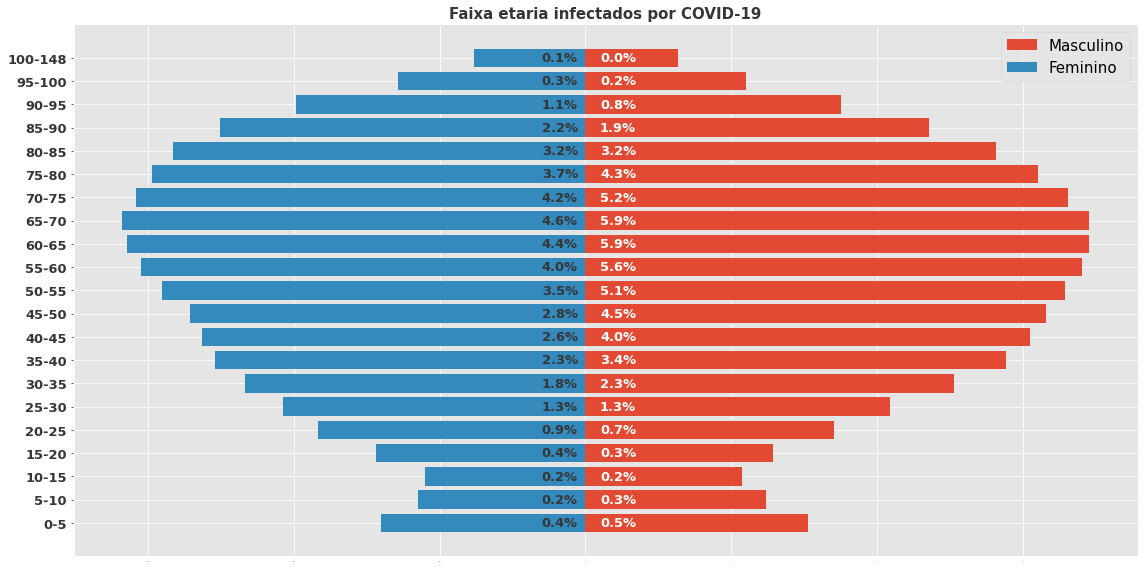

In [16]:
# Dados
data = data_set_cov[['NU_IDADE_N','CS_SEXO']]

dataM = data[data['CS_SEXO']=='M']['NU_IDADE_N']
dataF = data[data['CS_SEXO']=='F']['NU_IDADE_N']

label_list = [str(i)+'-'+str(j) for i,j in zip(range(0,105,5),range(5,105,5))]+['100-'+str(data['NU_IDADE_N'].max())]
bins=[x for x in range(0,105,5)]+[data['NU_IDADE_N'].max()]

m_idadeet=pd.cut(dataM,bins=bins, labels=label_list).value_counts()
f_idadeet=pd.cut(dataF,bins=bins, labels=label_list).value_counts()

m_idadeet = m_idadeet.sort_index()
f_idadeet = f_idadeet.sort_index()

display((m_idadeet+f_idadeet).to_frame())

Xm = np.cbrt(m_idadeet.values)
Ym = np.arange(len(m_idadeet))

xm_labels = (m_idadeet.values/(sum(m_idadeet.values)+sum(f_idadeet.values)))*100

Xf = - np.cbrt(f_idadeet.values)
Yf = np.arange(len(f_idadeet))
xf_labels = (f_idadeet.values/(sum(m_idadeet.values)+sum(f_idadeet.values)))*100

label = m_idadeet.keys()

# Grafico
plt.subplots(figsize=(16,8))
plt.barh(Ym,Xm,label='Masculino')
plt.barh(Yf,Xf,label='Feminino')

for x,y,s in zip(Xm,Ym,xm_labels):
  plt.text(1,y-0.15,str(round(s,1))+'%',fontsize=13,fontweight='bold',color='w')

for x,y,s in zip(Xf,Yf,xf_labels):
  plt.text(-3,y-0.15,str(round(s,1))+'%',fontsize=13,fontweight='bold',color='#363636')

plt.yticks(Ym,label,fontsize=13,fontweight='bold',color='#363636')
plt.title('Faixa etaria infectados por COVID-19',fontsize=15,fontweight='bold',color='#363636')
plt.tick_params(axis='x', labelsize=0, length = 0)
plt.legend(fontsize=15)

plt.tight_layout()


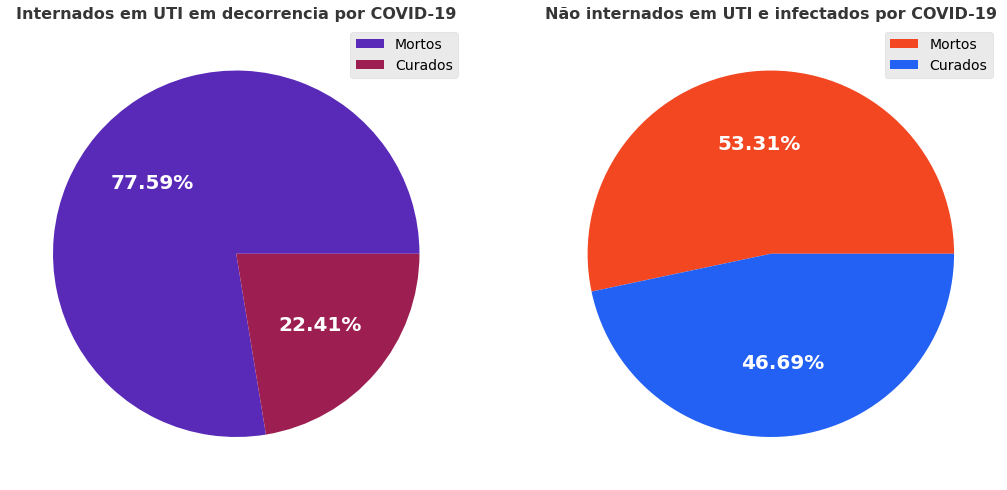

In [18]:
data = data_set_cov[['EVOLUCAO','UTI']]
data.EVOLUCAO = data.EVOLUCAO.replace(0,'Curado')
data.EVOLUCAO = data.EVOLUCAO.replace(1,'Morto')

internados = data[data.UTI == 0].EVOLUCAO.value_counts()
nao_internados = data[data.UTI == 1].EVOLUCAO.value_counts()

plt.subplots(figsize=(15,10))

plt.subplot(1, 2, 1)
plt.pie(internados,autopct=(lambda x: str(round(x,2))+"%"),textprops={'fontsize':20,'fontweight':'bold','color':'w'},colors=['#592AB8','#9D1E50'])
plt.title('Internados em UTI em decorrencia por COVID-19',fontsize=16,fontweight='bold',color='#363636')
plt.legend(['Mortos','Curados'],fontsize=14)

plt.subplot(1, 2, 2)
plt.pie(nao_internados,autopct=(lambda x: str(round(x,2))+"%"),textprops={'fontsize':20,'fontweight':'bold','color':'w'},colors=['#F34722','#2261F3'])
plt.title('Não internados em UTI e infectados por COVID-19',fontsize=16,fontweight='bold',color='#363636')
plt.legend(['Mortos','Curados'],fontsize=14)

plt.tight_layout()

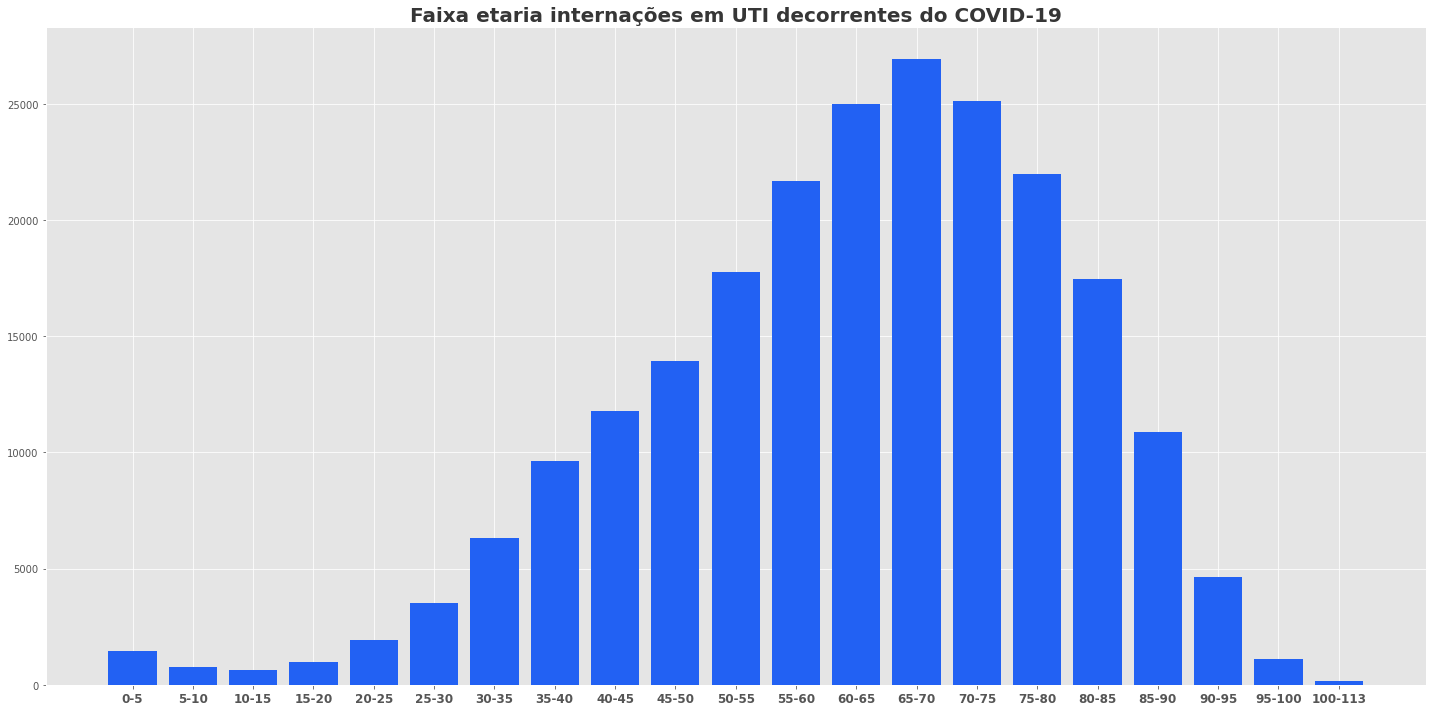

In [19]:
data = data_set_cov[['NU_IDADE_N','UTI']].dropna()
data = data[data.UTI == 1]
bins = [x for x in range(0,105,5)]+[data.NU_IDADE_N.max()]
label = [str(a)+'-'+str(b) for a,b in zip(range(0,105,5),range(5,105,5))]+['100-'+str(data.NU_IDADE_N.max())]

data_eta = pd.cut(data.NU_IDADE_N,bins=bins,labels=label).value_counts()
data_eta = data_eta.sort_index()
X = data_eta.keys()
Y = data_eta.values

plt.subplots(figsize=(20,10))
plt.bar(X,Y,color="#2261F3")
plt.title('Faixa etaria internações em UTI decorrentes do COVID-19',fontweight='bold',fontsize=20,color='#363636')
plt.xticks(fontweight='bold',fontsize=12)
plt.tight_layout()

0.0      8557
1.0     37228
2.0     28761
3.0     58520
4.0     32205
5.0    162518
Name: CS_ESCOL_N, dtype: int64


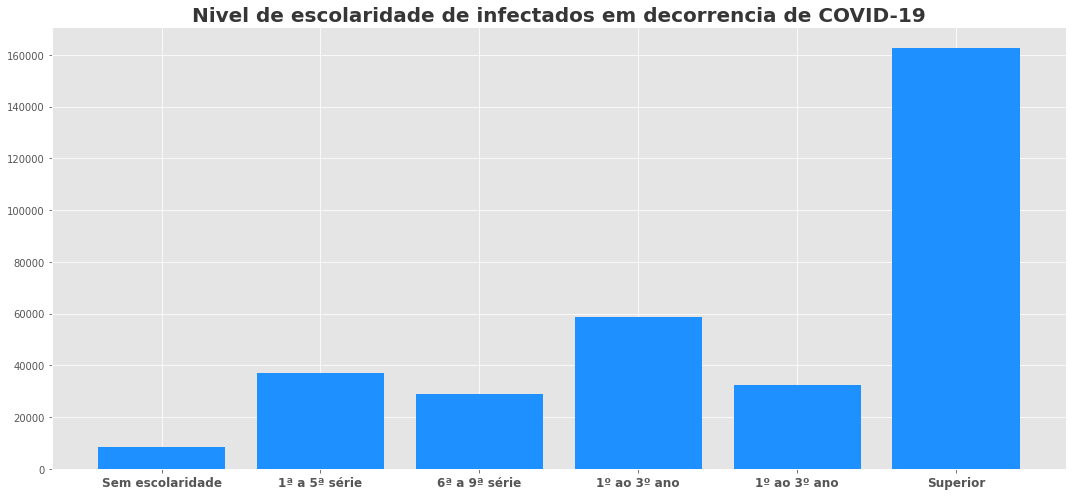

In [45]:
data = df_escol['CS_ESCOL_N'].value_counts()
data = data.sort_index()
print(data)
X = data.keys()
Y = data.values

labels_x = ['Sem escolaridade','1ª a 5ª série','6ª a 9ª série','1º ao 3º ano','1º ao 3º ano','Superior']

plt.subplots(figsize=(15,7))
plt.bar(X,Y,color='#1E90FF')
plt.xticks(X,labels_x,fontweight='bold',fontsize=12)
plt.title('Nivel de escolaridade de infectados em decorrencia de COVID-19',fontweight='bold',fontsize=20,color='#363636')
plt.tight_layout()

#Vivos

In [21]:
df_vivos_cov = data_set_cov[data_set_cov['EVOLUCAO'] == 0]
df_vivos_cov.head()

,DT_NOTIFIC,DT_SIN_PRI,SG_UF_NOT,CS_SEXO,NU_IDADE_N,CS_GESTANT,CS_RACA,CS_ESCOL_N,NOSOCOMIAL,FEBRE,TOSSE,GARGANTA,DISPNEIA,DESC_RESP,SATURACAO,DIARREIA,VOMITO,OUTRO_SIN,PUERPERA,FATOR_RISC,CARDIOPATI,HEMATOLOGI,SIND_DOWN,HEPATICA,ASMA,DIABETES,NEUROLOGIC,PNEUMOPATI,IMUNODEPRE,RENAL,OBESIDADE,OUT_MORBI,VACINA,MAE_VAC,ANTIVIRAL,DT_INTERNA,UTI,DT_ENTUTI,DT_SAIDUTI,SUPORT_VEN,CLASSI_FIN,EVOLUCAO,HISTO_VGM,DOR_ABD,FADIGA,PERD_OLFT,PERD_PALA
7,2020-06-03,02/03/2020,PA,M,53,6,4.0,4.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,NaN,1.0,06/03/2020,1.0,06/03/2020,NaT,0.0,5.0,0.0,2,0.0,0.0,0.0,0.0
24,2020-03-25,17/03/2020,SP,M,57,6,NaN,NaN,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,NaN,2.0,24/03/2020,0.0,NaN,NaT,0.0,5.0,0.0,2,0.0,0.0,0.0,0.0
49,2020-03-23,14/03/2020,SP,F,68,5,1.0,NaN,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,NaN,1.0,23/03/2020,0.0,NaN,NaT,0.0,5.0,0.0,0,0.0,0.0,0.0,0.0
65,2020-03-24,14/03/2020,SP,M,72,6,4.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,NaN,2.0,23/03/2020,0.0,NaN,NaT,0.0,5.0,0.0,2,0.0,0.0,0.0,0.0
69,2020-03-25,21/03/2020,SP,M,43,6,9.0,5.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,NaN,2.0,25/03/2020,1.0,28/03/2020,2020-07-04,1.0,5.0,0.0,2,0.0,0.0,0.0,0.0


In [22]:
# METRICAS
df_raca = df_vivos_cov.dropna(subset=['CS_RACA'],axis=0)
df_escol = df_vivos_cov.dropna(subset=['CS_ESCOL_N'],axis=0)
df_dt_uti = df_vivos_cov.dropna(subset=['DT_ENTUTI','DT_SAIDUTI'],axis=0)
df_vacina = df_vivos_cov.dropna(subset=['VACINA'],axis=0)
df_vacina = df_vivos_cov.dropna(subset=['ANTIVIRAL'],axis=0)
df_sintomas = df_vivos_cov[sintomas]
df_comorbidades = df_vivos_cov[comorbidades]

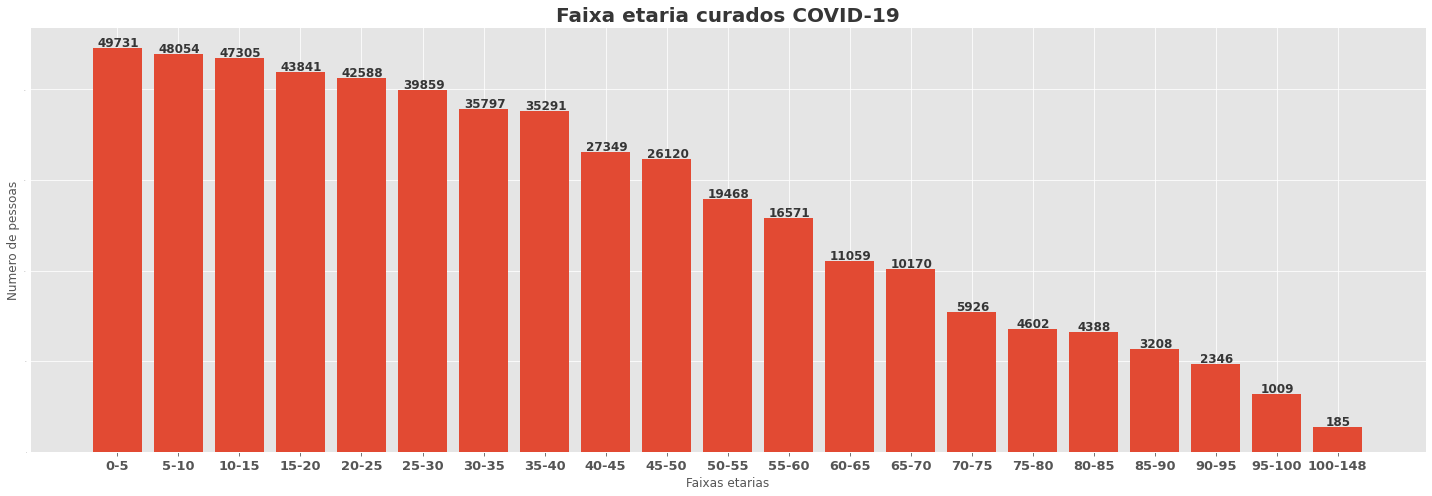

In [23]:
data = df_vivos_cov['NU_IDADE_N']
LX = [str(i)+'-'+str(j) for i,j in zip(range(0,105,5),range(5,105,5))]+['100-'+str(data.max())]

data = pd.cut(data,bins=[x for x in range(0,105,5)]+[data.max()],labels=LX)
data = data.value_counts()
X = np.arange(len(data))
Y = np.sqrt(data.values)

LY = data.values
plt.subplots(figsize=(20,7))
f = plt.bar(X,Y)
for x,y,s in zip(X,Y,LY):
  plt.text(x-len(str(s))/15.5,y+1,s,fontsize=12,fontweight='bold',color='#363636')

plt.xlabel('Faixas etarias')
plt.ylabel('Numero de pessoas')
plt.title('Faixa etaria curados COVID-19',fontsize=20,fontweight='bold',color='#363636')
plt.xticks(X,LX,fontsize=13,fontweight='bold')
plt.tick_params(axis='y', labelsize=0, length = 0)

plt.tight_layout()

,CS_RACA,cor
1.0,179527,Branca
4.0,158026,Preta
9.0,90809,Amarela
2.0,19905,Parda
3.0,5177,Indígena
5.0,1333,Ignorado


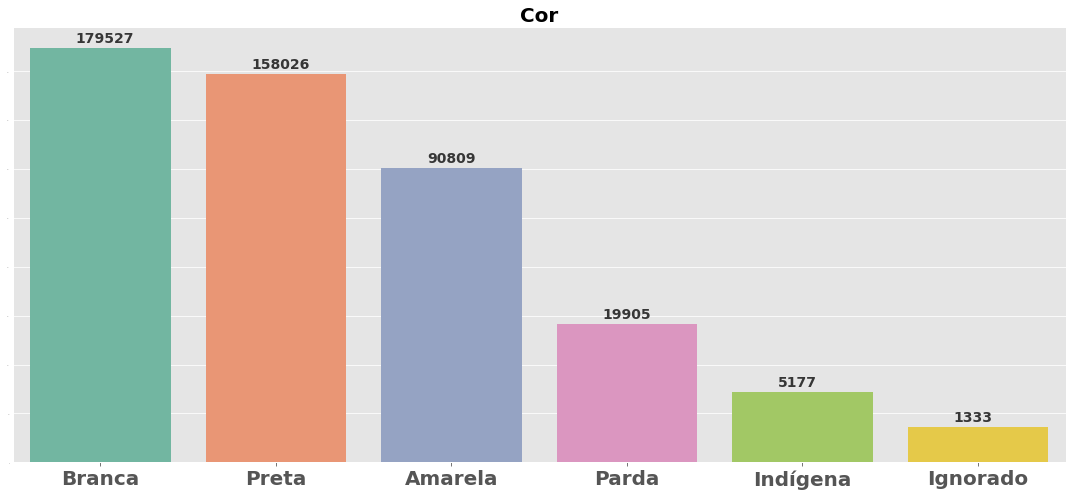

In [24]:
data = df_raca.CS_RACA.value_counts()
data = data.to_frame()
data['cor'] = ['Branca','Preta','Amarela','Parda','Indígena','Ignorado']
display(data)

X = np.arange(len(data))
Y = np.sqrt(data.CS_RACA.values)

x_labels = data.cor.values
y_labels = data.CS_RACA.values

plt.subplots(figsize=(15,7))
sns.barplot(x=X,y=Y,palette='Set2')


for x,y,s in zip(X,Y,y_labels):
  plt.text(x-0.14,y+6,s,fontsize=14,fontweight='bold',color='#363636')

plt.title('Cor',fontsize=20,fontweight='bold')
plt.xticks(X,x_labels,fontsize=20,fontweight='bold')
plt.tick_params(axis='y', labelsize=0, length = 0)
plt.tight_layout()

,Total sintomas
PUERPERA,1600.0
NOSOCOMIAL,7174.0
DOR_ABD,17508.0
PERD_OLFT,37461.0
PERD_PALA,37509.0
VOMITO,39606.0
FADIGA,66099.0
DIARREIA,70654.0
GARGANTA,92575.0
OUTRO_SIN,176940.0


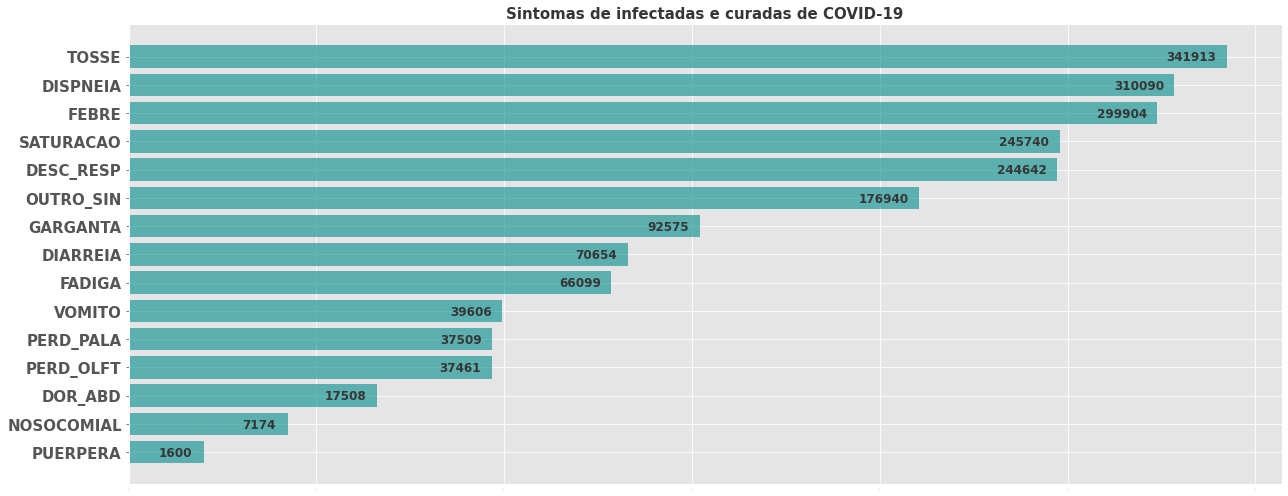

In [25]:
data = df_sintomas.sum().sort_values()

display(data.to_frame('Total sintomas'))
X = np.sqrt(data.values)
Y = np.arange(len(data))

x_labels = data.values
y_labels = data.keys()

plt.subplots(figsize=(18,7))
plt.barh(Y,X,color='darkcyan',alpha=0.6)

for x,y,s in zip(X,Y,x_labels):
  plt.text(x-(4*len(str(s))),y-0.14,round(s),fontsize=12,fontweight='bold',color='#363636')
plt.title('Sintomas de infectadas e curadas de COVID-19',fontsize=15,fontweight='bold',color='#363636')
plt.yticks(Y,y_labels,fontsize=15,fontweight='bold')
plt.tick_params(axis='x',labelsize = 0, length = 0)

plt.tight_layout()

,Total comorbidades
SIND_DOWN,1087.0
HEMATOLOGI,2908.0
HEPATICA,2924.0
IMUNODEPRE,9321.0
NEUROLOGIC,12183.0
RENAL,12335.0
PNEUMOPATI,12651.0
ASMA,13520.0
OBESIDADE,27428.0
DIABETES,102854.0


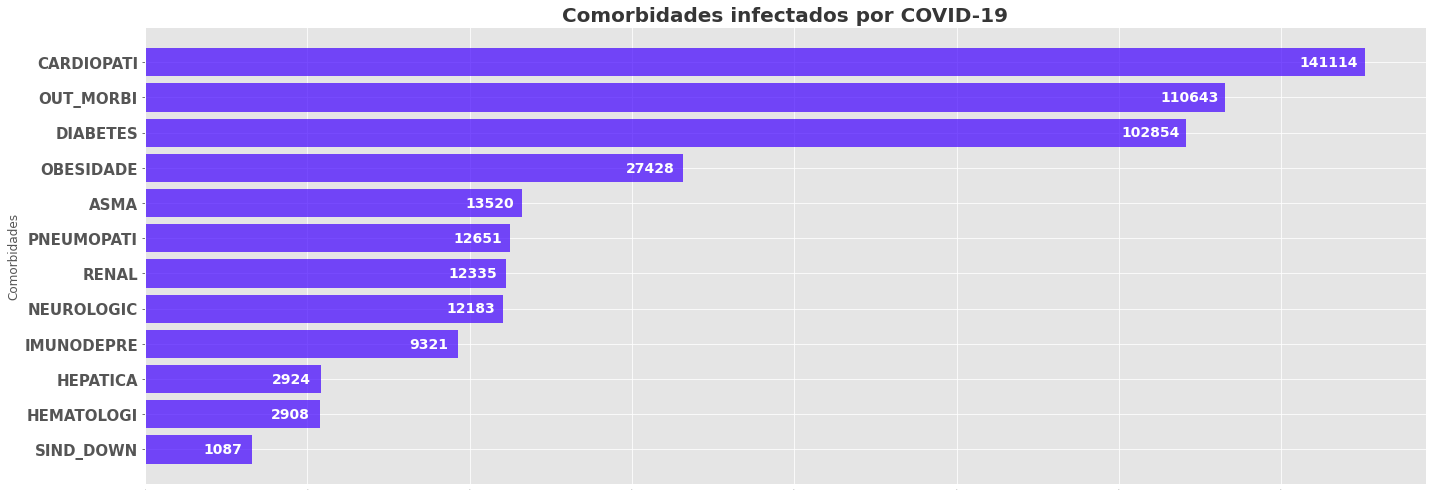

In [26]:
data = df_comorbidades.drop(['FATOR_RISC'],axis=1).sum().sort_values()
display(data.to_frame('Total comorbidades'))
X = np.sqrt(data.values)
Y = np.arange(len(data))

x_labels = data.values
y_labels = data.keys()

plt.subplots(figsize=(20,7))
plt.barh(Y,X,color='#4000ff',alpha=0.7,label='Numero de diagnosticos de comorbidade')

for x,y,s in zip(X,Y,x_labels):
  plt.text(x-len(str(s))*2.5,y-0.11,round(s),fontsize=14,fontweight='bold',color='w')

plt.ylabel('Comorbidades')
plt.title("Comorbidades infectados por COVID-19",fontsize=20,fontweight='bold',color='#363636')
plt.yticks(Y,y_labels,fontsize=15,fontweight='bold')
plt.tick_params(axis='x',labelsize=0,length=0)
# plt.legend()
plt.tight_layout()

# Mortos


**Hipoteses**
*   Distribuição de mortes entre sexo masculino e feminino
*   Distribuição de idades 
*   Nivel de escolaridade entre os mortos por COVID-19
*   Distribuição de raças entre as mortes por COVID-19
*   Tempo de UTI
*   Vacinação 
*   Anti virais
*   Sintomas
*   Comorbidades


In [27]:
df_mortes_cov = data_set_cov[data_set_cov['EVOLUCAO'] == 1]
df_mortes_cov.head()

,DT_NOTIFIC,DT_SIN_PRI,SG_UF_NOT,CS_SEXO,NU_IDADE_N,CS_GESTANT,CS_RACA,CS_ESCOL_N,NOSOCOMIAL,FEBRE,TOSSE,GARGANTA,DISPNEIA,DESC_RESP,SATURACAO,DIARREIA,VOMITO,OUTRO_SIN,PUERPERA,FATOR_RISC,CARDIOPATI,HEMATOLOGI,SIND_DOWN,HEPATICA,ASMA,DIABETES,NEUROLOGIC,PNEUMOPATI,IMUNODEPRE,RENAL,OBESIDADE,OUT_MORBI,VACINA,MAE_VAC,ANTIVIRAL,DT_INTERNA,UTI,DT_ENTUTI,DT_SAIDUTI,SUPORT_VEN,CLASSI_FIN,EVOLUCAO,HISTO_VGM,DOR_ABD,FADIGA,PERD_OLFT,PERD_PALA
51,2020-03-20,11/03/2020,SP,F,54,5,1.0,5.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9.0,NaN,1.0,13/03/2020,1.0,16/03/2020,NaT,1.0,5.0,1.0,2,0.0,0.0,0.0,0.0
62,2020-03-21,15/03/2020,SP,M,77,6,1.0,2.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,20/03/2020,1.0,21/03/2020,NaT,1.0,5.0,1.0,2,0.0,0.0,0.0,0.0
80,2020-04-04,04/04/2020,SP,F,82,5,4.0,NaN,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,NaN,2.0,04/04/2020,1.0,06/04/2020,2020-04-21,1.0,5.0,1.0,2,0.0,0.0,0.0,0.0
90,2020-01-04,26/03/2020,SP,M,68,6,1.0,5.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,NaN,9.0,01/04/2020,0.0,NaN,NaT,3.0,5.0,1.0,2,0.0,0.0,0.0,0.0
94,2020-03-22,20/03/2020,PE,M,88,6,4.0,5.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,20/03/2020,0.0,NaN,NaT,0.0,5.0,1.0,0,0.0,0.0,0.0,0.0


In [28]:
# METRICAS
df_raca_m = df_mortes_cov.dropna(subset=['CS_RACA'],axis=0)
df_escol_m = df_mortes_cov.dropna(subset=['CS_ESCOL_N'],axis=0)
df_dt_uti_m = df_mortes_cov.dropna(subset=['DT_ENTUTI','DT_SAIDUTI'],axis=0)
df_vacina_m = df_mortes_cov.dropna(subset=['VACINA'],axis=0)
df_vacina_m = df_mortes_cov.dropna(subset=['ANTIVIRAL'],axis=0)
df_sintomas_m = df_mortes_cov[sintomas]
df_comorbidades_m = df_mortes_cov[comorbidades]


,CS_SEXO
M,129690
F,96699
I,31


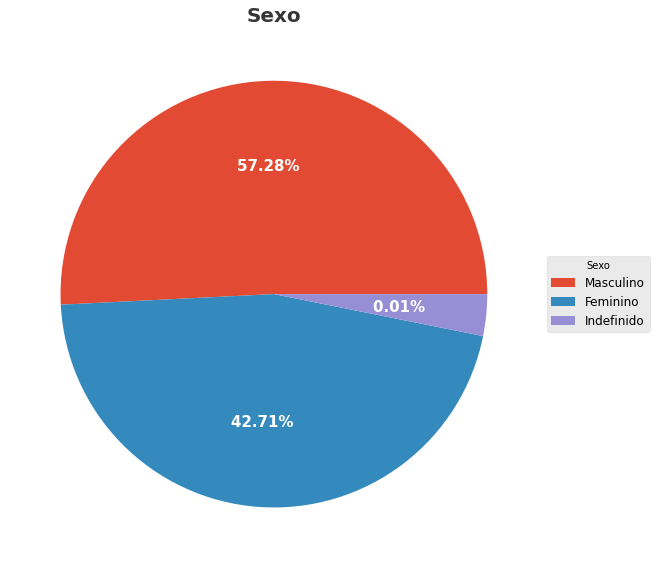

In [29]:
# Dados
data = df_mortes_cov.CS_SEXO.value_counts()

# Tabela
display(data.to_frame())

# Grafico
fig, ax = plt.subplots(figsize=(20,8))
plt.pie(np.cbrt(data),autopct=lambda pct:func_cbrt(pct,data),textprops={'fontweight':'bold','fontsize':15,'color':'w'})
plt.legend(['Masculino','Feminino','Indefinido'],title='Sexo',loc='center left',fontsize=12,bbox_to_anchor=[1,0,0.5,1])
plt.title('Sexo',fontsize=20,fontweight='bold',color='#363636')
fig.set_facecolor('white')
plt.tight_layout()

,CS_RACA,cor
5.0,777,Ignorado
3.0,2444,Indígena
2.0,12485,Parda
9.0,32490,Amarela
4.0,83175,Preta
1.0,85530,Branca


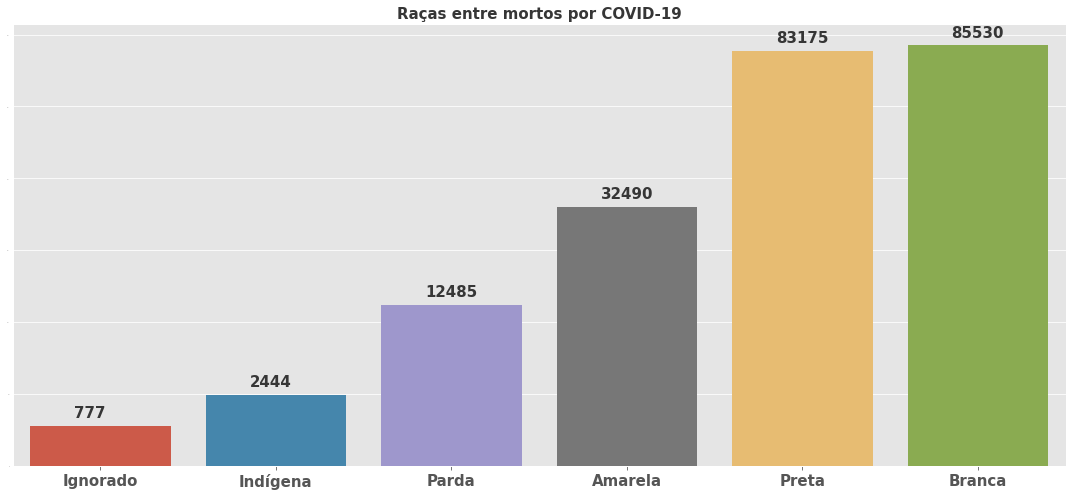

In [30]:
# Dados
data = df_raca_m.CS_RACA.value_counts()
data = data.to_frame()
data['cor'] = ['Branca','Preta','Amarela','Parda','Indígena','Ignorado']
data.sort_values(['CS_RACA'],inplace=True)
display(data)


# Grafico

X = np.arange(len(data)) 
Y = np.sqrt(data.CS_RACA.values)

x_labels = data.cor.values
y_labels = data.CS_RACA.values


plt.figure(figsize=(15,7))
sns.barplot(x = X,y = Y)
plt.title('Raças entre mortos por COVID-19',fontsize=15,fontweight='bold',color='#363636')
plt.xticks(X,x_labels,fontsize=15,fontweight='bold')
plt.tick_params(axis='y',labelsize=0,length=0)

for x,y,s in zip(X,Y,y_labels):
  plt.text(x-0.15,y+6,s,fontsize=15,fontweight='bold',color='#363636')

plt.tight_layout()

,Total
SIND_DOWN,680.0
HEMATOLOGI,2287.0
HEPATICA,3150.0
ASMA,4874.0
IMUNODEPRE,8279.0
PNEUMOPATI,13638.0
NEUROLOGIC,14662.0
OBESIDADE,14703.0
RENAL,15280.0
DIABETES,72454.0


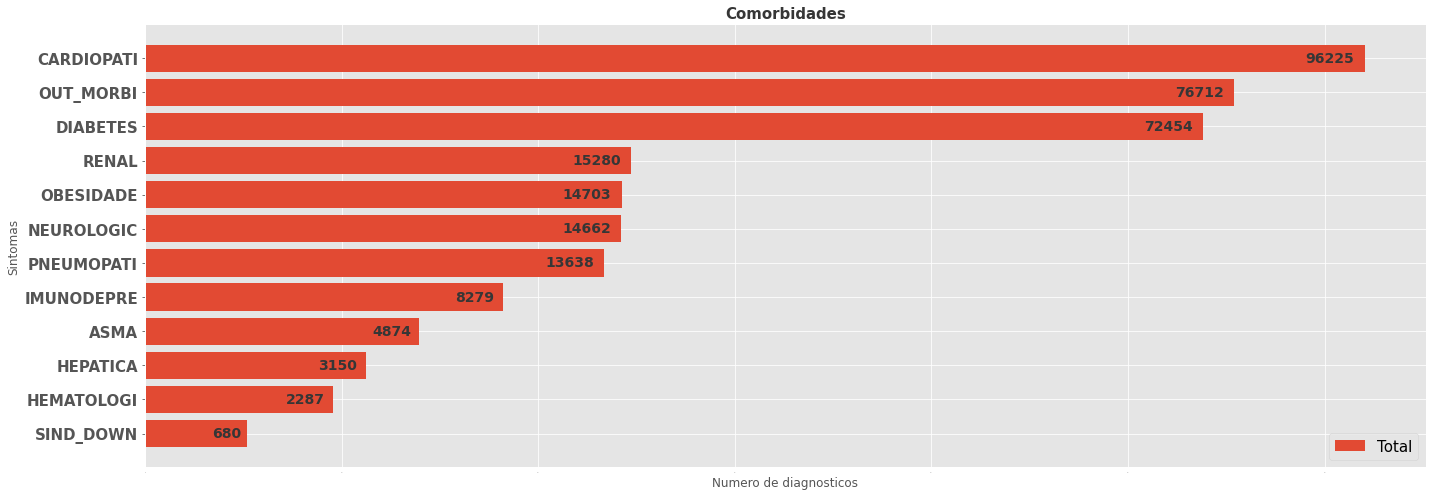

In [32]:
# Dados
data = round(df_comorbidades_m[df_comorbidades_m.FATOR_RISC == 1].iloc[:,1:].sum()).sort_values()

X = np.sqrt(data.values)
Y = np.arange(len(X))

x_labels = data.values
y_labels = data.keys()

# Tabela
display(data.to_frame('Total'))

# Grafico
plt.subplots(figsize=(20,7))
plt.barh(Y,X,label = "Total")

for x, y,s in zip(X,Y,x_labels):
    plt.text(x-len(str(round(s)))*3,y-0.11,round(s),fontsize=14,fontweight='bold',color='#363636')

plt.yticks(Y,y_labels,fontweight='bold',fontsize=15)
plt.title('Comorbidades',fontsize=15,fontweight='bold',color='#363636')
plt.ylabel('Sintomas')
plt.xlabel('Numero de diagnosticos')
plt.tick_params(axis='x',labelsize=0,length=0)
plt.legend(loc='lower right',fontsize=15)
    
plt.tight_layout()

,Total
PUERPERA,260.0
DOR_ABD,6482.0
NOSOCOMIAL,6602.0
PERD_PALA,9390.0
PERD_OLFT,9450.0
VOMITO,15243.0
DIARREIA,24074.0
FADIGA,26527.0
GARGANTA,31951.0
OUTRO_SIN,62625.0


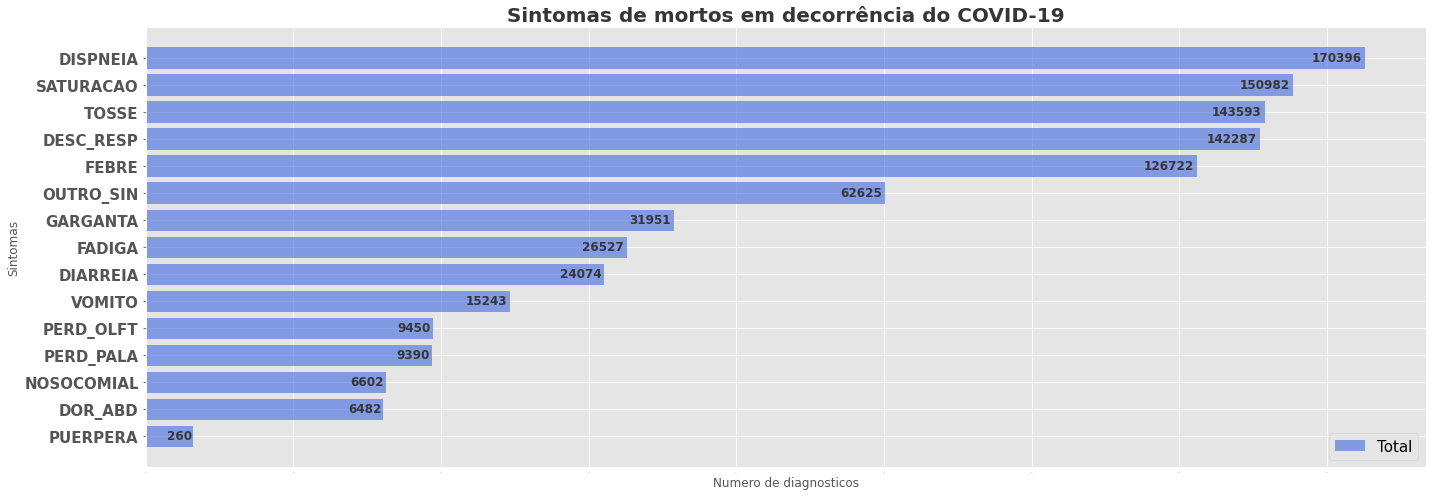

In [33]:
# Dados
data = df_sintomas_m.sum().sort_values()
display(data.to_frame('Total'))

X = np.sqrt(data.values)
Y = np.arange(len(X))

x_labels = data.values
y_labels = data.keys()

# Grafico
plt.subplots(figsize = (20, 7))
plt.barh(Y,X, alpha = .6, color = "royalblue",label='Total')


for x,y,s in zip(X,Y,x_labels):
    plt.text(x-len(str(round(s)))*3,y-0.11,round(s),fontsize=12,fontweight='bold',color='#363636')


plt.yticks(Y,y_labels,fontweight='bold',fontsize=15)
plt.title("Sintomas de mortos em decorrência do COVID-19",fontsize=20,fontweight='bold',color='#363636')
plt.xlabel("Numero de diagnosticos")
plt.ylabel("Sintomas")
plt.tick_params(axis='x',labelsize=0,length=0)
plt.legend(loc='lower right',fontsize=15)

plt.tight_layout()

0.0     9557
1.0    29320
2.0    17009
3.0    20870
4.0     8716
5.0    74182
Name: CS_ESCOL_N, dtype: int64


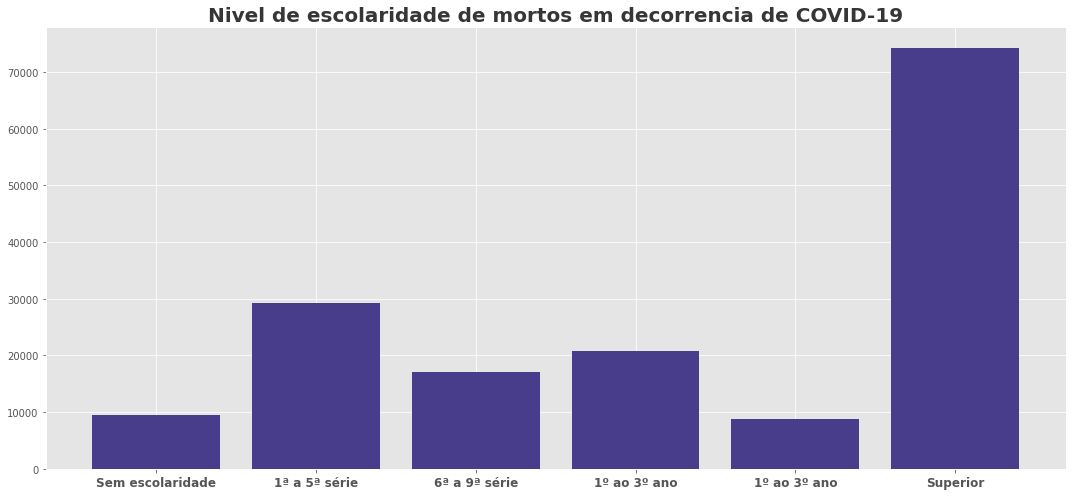

In [42]:
data = df_escol_m['CS_ESCOL_N'].value_counts()
data = data.sort_index()
print(data)
X = data.keys()
Y = data.values

labels_x = ['Sem escolaridade','1ª a 5ª série','6ª a 9ª série','1º ao 3º ano','1º ao 3º ano','Superior']

plt.subplots(figsize=(15,7))
plt.bar(X,Y,color='#483D8B')
plt.xticks(X,labels_x,fontweight='bold',fontsize=12)
plt.title('Nivel de escolaridade de mortos em decorrencia de COVID-19',fontweight='bold',fontsize=20,color='#363636')
plt.tight_layout()